#Elaboración de mapas con Google Colab

In [20]:
#Instalación de librerias básicas para tratar datos espaciales y elaborar mapas
!pip install geopandas
!pip install folium
!pip install gdal

In [21]:
#Importamos la libreria geopandas para el tratamiento de datos espaciales
import geopandas as gpd

In [22]:
#Accedemos al almacenamiento en la nube de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Definimos una ruta de acceso para los archivos
dirfile = '/content/drive/MyDrive/SIG_Clases/1_SIG/Datos'
#Declaramos la ruta de acceso a los archivos como directorio raíz
import os  # Libreria que incorpora funciones para incluir rutas de acceso
os.chdir(dirfile)
os.getcwd()

'/content/drive/MyDrive/SIG_Clases/1_SIG/Datos'

In [5]:
#Consultamos que archivos *.shp se encuentran en la ruta
import glob
glob.glob("*.shp")

['centros_de_salud.shp',
 'PLUS_LaPaz_BID.shp',
 'botadero.shp',
 'pcpn_anual_71_00.shp',
 'Caminos_Principales_y_Vía_Ferrea_Ajustado.shp',
 'departamentos_geo.shp',
 'riesgosequia.shp',
 'PrincipalesCentrosPoblados.shp',
 'PLUS_LaPaz_BID (1).shp',
 'PLUS_LaPaz_BID (2).shp',
 'Cochabamba.shp']

**1. Mapa de datos puntuales**

In [6]:
#Importar un archivo shapfile desde google drive mediante Geopandas
c_salud = gpd.read_file('/content/drive/MyDrive/SIG_Clases/1_SIG/Datos/centros_de_salud.shp')

In [7]:
# Revisamos el encabezado y primera fila de la tabla de atributos del archivo vectorial
c_salud.head(3)

,ID,DEPTO,RED,CODMUNI,MUNICIPIO,ESTSALUD,POSTSAL,CENTSAL,HOSPBAS,HOSPGEN,INSTITUTO,TIPOESTAB,NIVELAT,TOTAL,geometry
0,3460,TARIJA,BERMEJO,060202,BERMEJO,C.S. COLONIA LINARES,0,1,0,0,0,CS,1,1,POINT (-64.28454 -22.66096)
1,3461,TARIJA,BERMEJO,060202,BERMEJO,CAJA PETROLERA BERMEJO,0,0,1,0,0,H2,2,1,POINT (-64.33650 -22.73263)
2,3462,TARIJA,BERMEJO,060202,BERMEJO,CLINICA SANTA MARIA,0,1,0,0,0,CS,1,1,POINT (-64.33650 -22.73662)


In [8]:
# Consultar el CRS de origen del Shapefile
c_salud.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

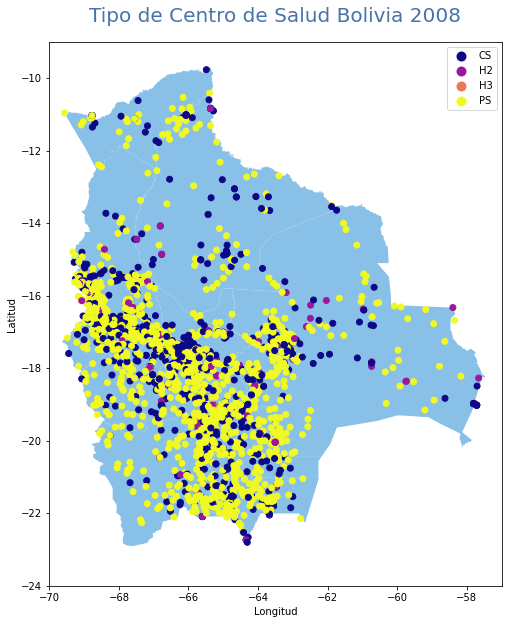

In [16]:
#graficamos el archivo vectorial de puntos
# Crear mapa
# Control del tamaño de la figura del mapa
import matplotlib.pyplot as plt  # Libreria para gráficar datos vectoriales
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-70, -57, -24, -9])
 
# Control del título y los ejes
ax.set_title('Tipo de Centro de Salud Bolivia 2008', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
#from mpl_toolkits.axes_grid1 import make_axes_locatable
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
c_salud.plot(column='TIPOESTAB', cmap='magma', ax=ax,
              legend=True, cax=cax, zorder=5)
# Cargar un mapa base con contornos de departamentos
departamentos = gpd.read_file('/content/drive/MyDrive/SIG_Clases/1_SIG/Datos/departamentos_geo.shp')
departamentos.plot(ax=ax, color='#89c0e8', zorder=0)

**2. Mapa de Datos Lineales**

In [10]:
#Importar un archivo shapfile desde google drive mediante Geopandas
camino = gpd.read_file('/content/drive/MyDrive/SIG_Clases/1_SIG/Datos/Caminos_Principales_y_Vía_Ferrea_Ajustado.shp')

In [11]:
# Revisamos el encabezado y primera fila de la tabla de atributos del archivo vectorial
camino.head(3)

,OBJECTID,OBJECTID_2,Tipo,Longitud,LTN,COD_RST,TIPO_RST,WD1,COD_COS,AHA,OBJETO,COD_TEMA,TEMA,NM3,COD_OBJETO,CLASE,NAM,Codigo,Shape_Leng,geometry
0,16539,16747.0,TIERRA,0.000000,None,RST34,OPERACIONAL,None,COS013,None,CAMINO,AP,TRANSPORTE,BOLIVIA,None,SECUNDARIO,OMEREQUE - PASORAPA,AL030,0.370987,"LINESTRING Z (-64.67705 -18.32096 0.00000, -64..."
1,16573,4630.0,TIERRA,6728.394651,None,RST34,OPERACIONAL,None,COS013,None,CAMINO,AP,TRANSPORTE,BOLIVIA,None,SECUNDARIO,HUANCANE - COACOANI,AL030,0.162682,"LINESTRING Z (-66.75620 -18.69069 0.00000, -66..."
2,0,0.0,TIERRA,0.000000,None,None,None,None,None,None,None,None,None,None,None,None,CHOCOPATILLA - DESVIO,None,0.000000,"LINESTRING Z (-66.64113 -18.39475 0.00000, -66..."


In [12]:
# Consultar el CRS de origen del Shapefile
camino.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

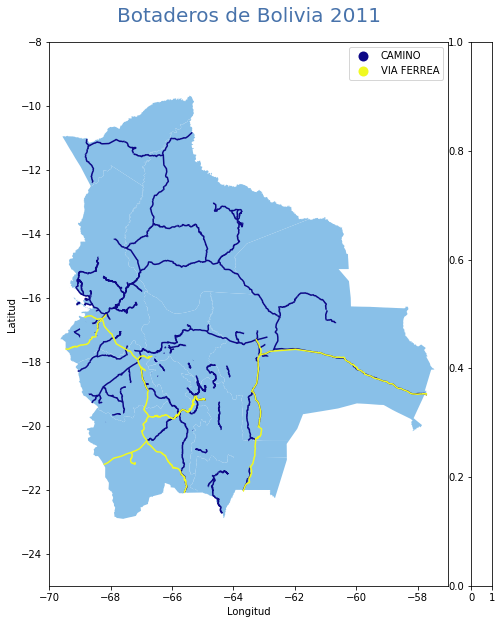

In [14]:
#graficamos el archivo vectorial de puntos
# Crear mapa
# Control del tamaño de la figura del mapa
import matplotlib.pyplot as plt  # Libreria para gráficar datos vectoriales
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-70, -57, -25, -8])
 
# Control del título y los ejes
ax.set_title('Botaderos de Bolivia 2011', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
camino.plot(column='OBJETO', cmap='plasma', ax=ax,
              legend=True, cax=cax, zorder=5)
 
# Cargar un mapa base con contornos de departamentos
departamentos = gpd.read_file('/content/drive/MyDrive/SIG_Clases/1_SIG/Datos/departamentos_geo.shp')
departamentos.plot(ax=ax, color='#89c0e8', zorder=0)

**3. Mapa de Datos de superficie**

In [ ]:
#Importar un archivo shapfile desde google drive mediante Geopandas
PLUS = gpd.read_file('/content/drive/MyDrive/SIG_Clases/1_SIG/Datos/PLUS_LaPaz_BID.shp')

In [ ]:
# Revisamos el encabezado y primera fila de la tabla de atributos del archivo vectorial
PLUS.head(3)

,ZAE_ID,PLUS,LEY1,ZAE,DEPTO,ZAEFIN1,FISIOID,PAISAJE,SUBPAISAJE,UNITER_ID,AGRINTEN,AGRIEXTEN,FORNATUR,FORMADER,GANINTEN,GANEXTEN,AREA,geometry
0,1,4.2,None,4.2,lp1,F,None,Llanuras,Superficies de erosion,None,4,4,1,3,4,4,6784488906,"POLYGON ((-68.55306 -12.43809, -68.54856 -12.4..."
1,2,4.2UR,None,5.4,lp1,Ful,None,Llanuras,Llanuras aluviales,None,4,4,4,4,4,4,37024333,"POLYGON ((-67.68912 -11.99553, -67.68436 -11.9..."
2,3,4.2UR,None,5.4,lp1,Ful,None,Llanuras,Llanuras aluviales,None,4,4,4,4,4,4,77895743,"POLYGON ((-67.66817 -12.00764, -67.66042 -12.0..."


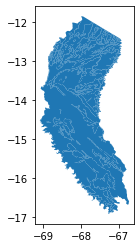

In [ ]:
PLUS.plot()

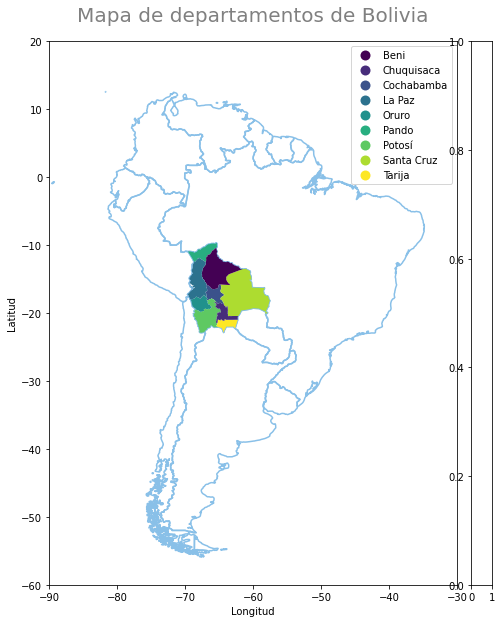

In [ ]:
# Crear mapa
# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-90, -30, -60, 20])
 
# Control del título y los ejes
ax.set_title('Mapa de departamentos de Bolivia', 
             pad = 20, 
             fontdict={'fontsize':20, 'color': '#808080'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa
departamentos.plot(column='DEPARTAMEN', cmap='viridis', ax=ax,
              legend=True, cax=cax, zorder=5)
 
# Cargar un mapa base con contornos de países
 
Suramerica = gpd.read_file('/content/drive/My Drive/SIG_Clases/1_SIG/Límite_País.shp')
Suramerica.plot(ax=ax, color='#89c0e8', zorder=0)

**4. Mapa de puntos**

In [ ]:
#Importar un archivo shapfile desde google drive mediante Geopandas
poblados = gpd.read_file('/content/drive/My Drive/SIG_Clases/1_SIG/Datos/PrincipalesCentrosPoblados.shp')

In [ ]:
# Revisamos el encabezado y primera fila de la tabla de atributos del archivo vectorial
poblados.head(3)

,gml_id,NOMBRE,ID,CODDEP,CODPROV,CODSECPROV,CODCENPOBL,CODLCENPOB,PTHM_92,TASA_CREC,CENCLAS,CENCLAS_1,TASACOLOR,CAPRO1S,geometry
0,PrincipalesCentrosPoblados.1,SUCRE,1,01,01,01,101,01010101101,131769.0,4.63722,2,2,2C,None,POINT (-65.26324 -19.04535)
1,PrincipalesCentrosPoblados.2,COCHABAMBA,29,03,01,01,101,03010101101,407825.0,4.39090,1,1,1C,None,POINT (-66.17043 -17.38918)
2,PrincipalesCentrosPoblados.3,ORURO,50,04,01,01,101,04010101101,183422.0,2.48275,2,2,2G,None,POINT (-67.11293 -17.96622)


In [ ]:
# Consultar el CRS de origen del Shapefile
poblados.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

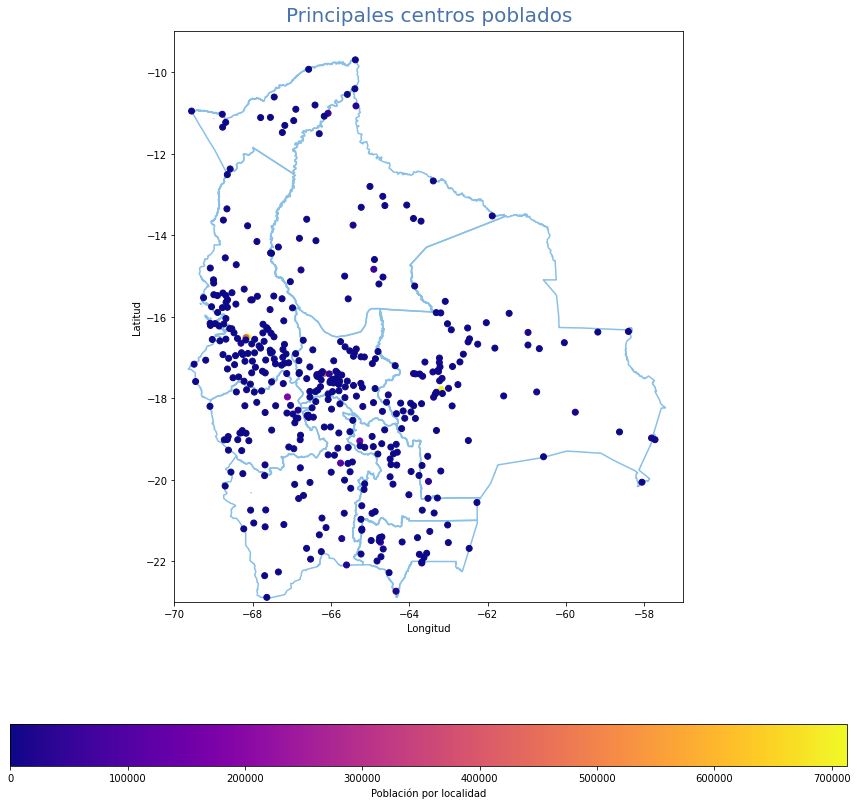

In [ ]:
#graficamos el archivo vectorial de puntos
# Crear mapa
# Control del tamaño de la figura del mapa
import matplotlib.pyplot as plt  # Libreria para gráficar datos vectoriales
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-70, -57, -23, -9])
 
# Control del título y los ejes
ax.set_title('Principales centros poblados', 
             pad = 10, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Generar y cargar el mapa incluyendo la leyenda
poblados.plot(column='PTHM_92', cmap='plasma', ax=ax,
              legend=True, legend_kwds={'label': "Población por localidad",'orientation': "horizontal"})
 #cax=cax, zorder=5
# Cargar un mapa base con contornos de departamentos
departamentos.boundary.plot(ax=ax, color='#89c0e8', zorder=0)

**5. Mapa de isolineas**

In [ ]:
#Importar un archivo shapfile desde google drive mediante Geopandas
isoyetas = gpd.read_file('/content/drive/My Drive/SIG_Clases/1_SIG/Datos/pcpn_anual_71_00.shp')

In [ ]:
# Revisamos el encabezado y primera fila de la tabla de atributos del archivo vectorial
isoyetas.head(3)

,ID,CONTOUR,geometry
0,1,1700,"LINESTRING (-65.39385 -13.91002, -65.39940 -13..."
1,2,2300,"LINESTRING (-67.47633 -14.59742, -67.46825 -14..."
2,3,2200,"LINESTRING (-67.43033 -14.72993, -67.42842 -14..."


In [ ]:
# Consultar el CRS de origen del Shapefile
poblados.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

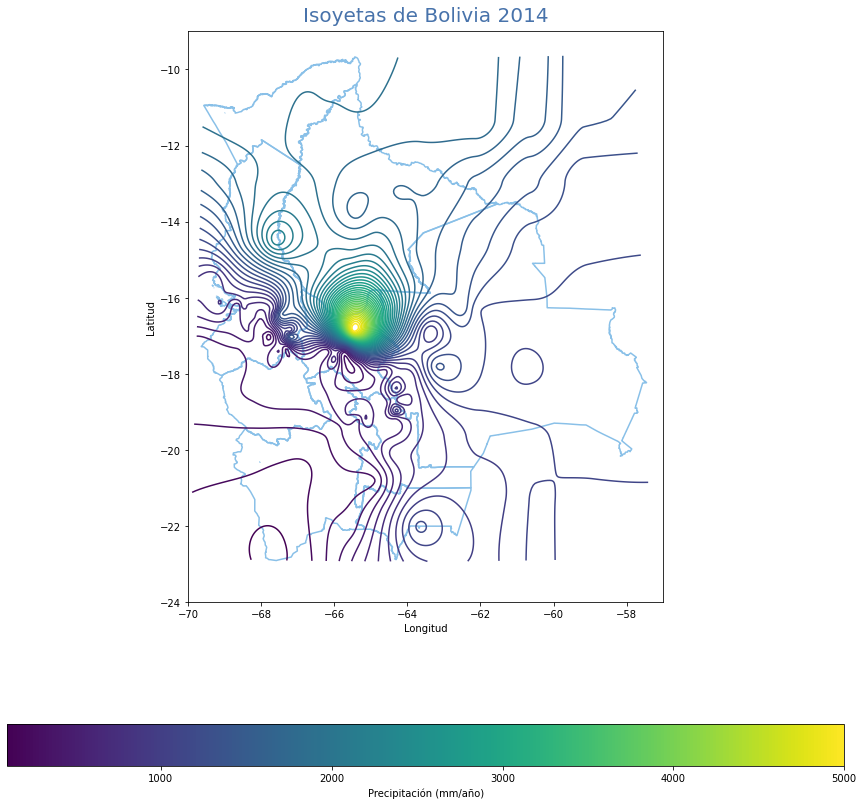

In [ ]:
#graficamos el archivo vectorial de lineas
# Crear mapa
# Control del tamaño de la figura del mapa
import matplotlib.pyplot as plt  # Libreria para gráficar datos vectoriales
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([-70, -57, -24, -9])
 
# Control del título y los ejes
ax.set_title('Isoyetas de Bolivia 2014', 
             pad = 10, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
 
# Generar y cargar el mapa incluyendo la leyenda
isoyetas.plot(column='CONTOUR', cmap='viridis', ax=ax,
              legend=True, legend_kwds={'label': "Precipitación (mm/año)",'orientation': "horizontal"})
 #cax=cax, zorder=5
# Cargar un mapa base con contornos de departamentos
departamentos.boundary.plot(ax=ax, color='#89c0e8', zorder=0)

**6. Mapa de Coropletas**

In [ ]:
#Importar un archivo shapfile desde google drive mediante Geopandas
sequia = gpd.read_file('/content/drive/My Drive/SIG_Clases/1_SIG/Datos/riesgosequia.shp')

In [ ]:
# Revisamos el encabezado y primera fila de la tabla de atributos del archivo vectorial
sequia.head(3)

,AREA,SEQ3_ID,Leyenda,geometry
0,2.800210e+11,3.0,1/cada 2 aÃ±os,"MULTIPOLYGON (((515284.176 8148721.789, 515276..."
1,0.000000e+00,2.0,1/cada 4 aÃ±os,"POLYGON ((524966.987 8189926.517, 525003.394 8..."
2,0.000000e+00,2.0,1/cada 4 aÃ±os,"POLYGON ((532045.188 8191613.366, 532026.120 8..."


In [ ]:
# Consultar el CRS de origen del Shapefile
sequia.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

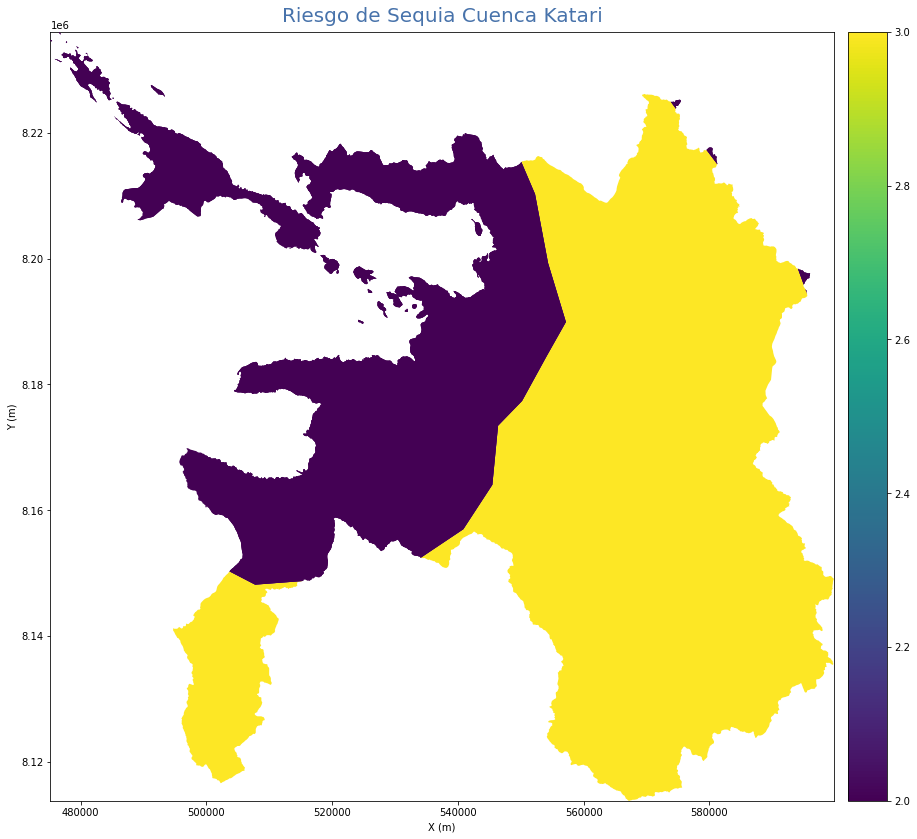

In [ ]:
#graficamos el archivo vectorial de superficie
# Crear mapa
# Control del tamaño de la figura del mapa
import matplotlib.pyplot as plt  # Libreria para gráficar datos vectoriales
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
 
# Control del encuadre (área geográfica) del mapa
ax.axis([475221, 599806, 8113789, 8236084])
 
# Control del título y los ejes
ax.set_title('Riesgo de Sequia Cuenca Katari', 
             pad = 10, 
             fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
 
# Añadir la leyenda separada del mapa
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)
 
# Generar y cargar el mapa incluyendo la leyenda
sequia.plot(column='SEQ3_ID',cmap='viridis', ax=ax,
              legend=True, cax=cax, zorder=5)
 #cax=cax, zorder=5


**Mapas Dinámicos**

In [ ]:
#Importando la libreria folium, que permite llamar a una interfaz más amigable para la representación de datos espaciales
import folium
m = folium.Map([-16.5, -65.5], zoom_start=6)
 
folium.GeoJson(departamentos).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Ver en mapa con relieve 2.5D
m = folium.Map(
    location=[-16.5, -65.5],
    zoom_start=6,
    tiles='Stamen Terrain'
)
# Añadir coordenadas mediante el puntero
m.add_child(folium.LatLngPopup())
#Añadir marcadores
tooltip = 'Click me!'
 
folium.Marker([-16.5, -65.5], popup='<i>Mt. Hood Meadows</i>', tooltip=tooltip).add_to(m)
folium.Marker([-17, -66], popup='<b>Timberline Lodge</b>', tooltip=tooltip).add_to(m)
 
m